In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
#load info
initial_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.initial.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
initial_gene = initial_gene.T
initial_gene.index = initial_gene.index.map(lambda x: str(x)[:-2])
initial_gene_marker = initial_gene.loc[:,["FOXP3", "IL2RA"]]
initial_gene_marker

,FOXP3,IL2RA
PS001,0.196915,0.116842
PS002,0.037678,1.634623
PS003,0.053440,1.009910
PS004,0.083158,2.767293
PS005,0.066720,0.353793
PS006,0.159466,0.005377
PS007,0.053387,0.955772
PS008,0.146369,0.119391
PS009,0.079699,0.876754
PS010,0.122586,0.238462


In [7]:
recurrence_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.recurrence.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
recurrence_gene = recurrence_gene.T
recurrence_gene.index = recurrence_gene.index.map(lambda x: str(x)[:-2])
recurrence_gene_marker = recurrence_gene.loc[:,["FOXP3", "IL2RA"]]
recurrence_gene_marker

,FOXP3,IL2RA
PS001,0.051262,0.000176
PS002,0.104839,1.415394
PS003,0.059368,0.017560
PS004,0.165933,2.434611
PS005,0.137920,0.102598
PS006,0.264138,0.537702
PS007,0.985629,4.172255
PS008,0.138030,0.271468
PS009,0.219737,0.153226
PS010,0.063998,0.484681


In [8]:
common = initial_gene_marker.index.intersection(Patient_Info.index)
common2 = recurrence_gene_marker.index.intersection(Patient_Info.index)
final_common = recurrence_gene_marker.index.intersection(initial_gene_marker.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', length=181)

In [9]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
pathology = combined_data.loc[:, combined_data.columns == "Molecular pathology (per GLASS)"]

In [10]:
select = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Glioblastoma")]
pathology.loc[select.index, 'Histology'] = "Glioblastoma"

/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
#selecting for Diffuse Astrocytoma
select2 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Diffuse Astrocytoma")]
pathology.loc[select2.index, 'Histology'] = "Diffuse Astrocytoma"

/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [12]:
#selecting for Anaplastic Astrocytoma
select3 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Anaplastic Astrocytoma")]
pathology.loc[select3.index, 'Histology'] = "Anaplastic Astrocytoma"

In [13]:
#selecting for Oligodendroglioma
select4 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Oligodendroglioma")]
pathology.loc[select4.index, 'Histology'] = "Oligodendroglioma"

In [14]:
#selecting for Anaplastic Oligodendroglioma
select5 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Anaplastic Oligodendroglioma")]
pathology.loc[select5.index, 'Histology'] = "Anaplastic Oligodendroglioma"

In [15]:
#FOXP3
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "FOXP3"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "FOXP3"]
recurrence.columns = ['Recurrent']
FOXP3_data = initial.join(recurrence)
FOXP3_data

,Initial,Recurrent
PS001,0.196915,0.051262
PS002,0.037678,0.104839
PS003,0.053440,0.059368
PS004,0.083158,0.165933
PS005,0.066720,0.137920
PS006,0.159466,0.264138
PS007,0.053387,0.985629
PS008,0.146369,0.138030
PS009,0.079699,0.219737
PS010,0.122586,0.063998


In [16]:
FOXP3_final = pd.concat([pathology, FOXP3_data], axis=1)
FOXP3_final.index.name = 'Mixture'
FOXP3_final = FOXP3_final.drop(['Molecular pathology (per GLASS)'], axis=1)
FOXP3_final = FOXP3_final.sort_values(by='Mixture')
FOXP3_final

,Histology,Initial,Recurrent
Mixture,,,
PS001,Glioblastoma,0.196915,0.051262
PS002,Glioblastoma,0.037678,0.104839
PS003,Glioblastoma,0.053440,0.059368
PS004,Glioblastoma,0.083158,0.165933
PS005,Glioblastoma,0.066720,0.137920
PS006,Glioblastoma,0.159466,0.264138
PS007,Glioblastoma,0.053387,0.985629
PS008,Glioblastoma,0.146369,0.138030
PS009,Glioblastoma,0.079699,0.219737


In [17]:
FOXP3_mdf = pd.melt(FOXP3_final.reset_index(), id_vars=('Mixture','Histology'))
FOXP3_mdf

,Mixture,Histology,variable,value
0,PS001,Glioblastoma,Initial,0.196915
1,PS002,Glioblastoma,Initial,0.037678
2,PS003,Glioblastoma,Initial,0.053440
3,PS004,Glioblastoma,Initial,0.083158
4,PS005,Glioblastoma,Initial,0.066720
5,PS006,Glioblastoma,Initial,0.159466
6,PS007,Glioblastoma,Initial,0.053387
7,PS008,Glioblastoma,Initial,0.146369
8,PS009,Glioblastoma,Initial,0.079699
9,PS010,Glioblastoma,Initial,0.122586


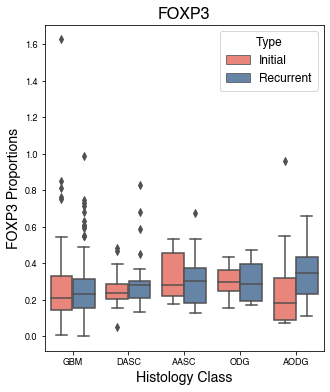

In [18]:
# plt.figure(figsize=(8,6))
# plt.rcParams['font.size'] = '8'
# ax = sns.boxplot(x='Histology', y='value', data=FOXP3_mdf, hue='variable',palette="Pastel1")

import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(5,6))
#plt.rcParams['font.size'] = '8'
plt.title("FOXP3", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Histology', y='value',hue="variable", data=FOXP3_mdf)
ax.set_xlabel("Histology Class", fontsize=14)
ax.set_ylabel("FOXP3 Proportions", fontsize=14)  
labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
ax.set_xticklabels(labels)
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [19]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for p in histologies:
    specific_progression = FOXP3_mdf.loc[FOXP3_mdf['Histology'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.6908144564680089, pvalue=0.48968214950131117)
--------------------------------
Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.8029550685469662, pvalue=0.42200070503759224)
--------------------------------
Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=0.23094010767585027, pvalue=0.8173613313851769)
--------------------------------
Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=0.07559289460184544, pvalue=0.9397429895770734)
--------------------------------
Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.155231069323108, pvalue=0.24799581483148547)
--------------------------------


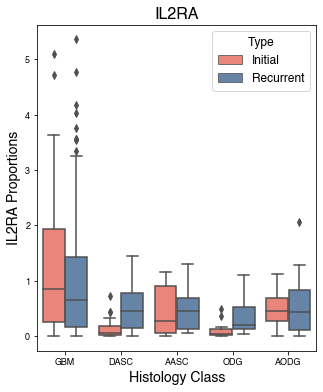

In [20]:
#IL2RA
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "IL2RA"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "IL2RA"]
recurrence.columns = ['Recurrent']
IL2RA_data = initial.join(recurrence)
IL2RA_final = pd.concat([pathology, IL2RA_data], axis=1)
IL2RA_final.index.name = 'Mixture'
IL2RA_final = IL2RA_final.drop(['Molecular pathology (per GLASS)'], axis=1)
IL2RA_final = IL2RA_final.sort_values(by='Mixture')
IL2RA_mdf = pd.melt(IL2RA_final.reset_index(), id_vars=('Mixture','Histology'))
plt.figure(figsize=(5,6))
plt.title("IL2RA", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Histology', y='value',hue="variable", data=IL2RA_mdf)
ax.set_xlabel("Histology Class", fontsize=14)
ax.set_ylabel("IL2RA Proportions", fontsize=14)  
labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
ax.set_xticklabels(labels)
# legend = ["Initial", "Recurrent"]
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [21]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for p in histologies:
    specific_progression = IL2RA_mdf.loc[IL2RA_mdf['Histology'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=1.1334374674864218, pvalue=0.2570305873513439)
--------------------------------
Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-4.063935857135665, pvalue=4.8252090998557375e-05)
--------------------------------
Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.7505553499465134, pvalue=0.4529203011037244)
--------------------------------
Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=-2.4945655218609, pvalue=0.012611144099313947)
--------------------------------
Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.21004201260420147, pvalue=0.8336348830246822)
--------------------------------
